# Appending to DataFrames and Lists: A Comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In L3.1 we cheated and set up a pandas DataFrame to use hold all of our trades. But in reality we usually don't know before hand when they are going to get added. For this we will usually just want to append to an array instead of the data frame because it's a lot faster...

In [2]:
def df_append_test(count):
    number_of_loops = np.arange(count)
    df = pd.DataFrame(columns=['trade_price', 'trade_qty'])
    for i in number_of_loops:
        df = df.append({'trade_price' : 40.0, 'trade_qty' : i}, ignore_index=True)
    return df

In [3]:
df = df_append_test(1000)

In [4]:
def list_append_test(count):
    number_of_loops = np.arange(count)
    ls = []
    for i in number_of_loops:
        ls.append((40, 100))
    return ls

In [5]:
arr = list_append_test(1000)

One is a LOT faster!

So keep your trades in a list and you can always convert them to a dataframe later:

In [6]:
# different values of dataframe
%timeit df = df_append_test(10)
%timeit df = df_append_test(100)
%timeit df = df_append_test(1000)
#%timeit df = df_append_test(10000)
#%timeit df = df_append_test(100000)

12 ms ± 539 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
98.5 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
953 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit arr = list_append_test(10)
%timeit arr = list_append_test(100)
%timeit arr = list_append_test(1000)
#%timeit arr = list_append_test(10000)
#%timeit arr = list_append_test(100000)

4 µs ± 66.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
26.2 µs ± 2.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
224 µs ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%timeit df = df_append_test(1000000)
%timeit arr = list_append_test(1000000)

KeyboardInterrupt: 

In [5]:
df_method = pd.DataFrame({'count' : [10, 100, 1000, 10000, 100000, 1000000], 'time' : [9710, 79800, 776000, 7930000, 83000000, 1864000000]})

In [6]:
list_method = pd.DataFrame({'count' : [10, 100, 1000, 10000, 100000, 1000000], 'time' : [2.95, 17.5, 160, 1550, 16100, 152000]})

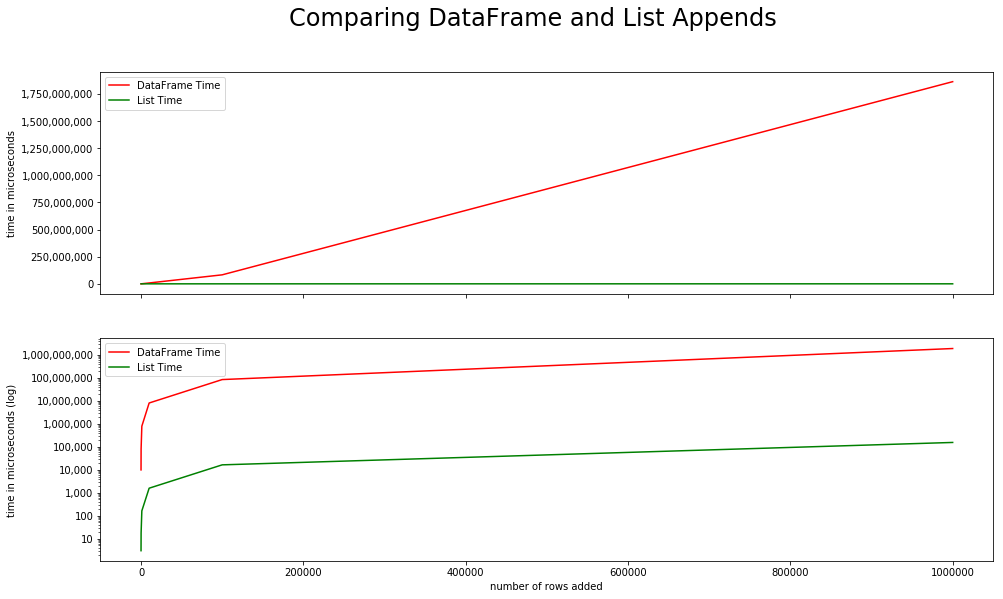

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9), sharex=True)
fig.suptitle('Comparing DataFrame and List Appends', fontsize='24')

ax1.plot(df_method['count'], df_method['time'], 'r-', label='DataFrame Time')
ax1.plot(list_method['count'], list_method['time'], 'g-', label='List Time')
ax1.set_ylabel("time in microseconds")
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.legend()

ax2.plot(df_method['count'], df_method['time'], 'r-', label='DataFrame Time')
ax2.plot(list_method['count'], list_method['time'], 'g-', label='List Time')
ax2.set_ylabel('time in microseconds (log)')
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_xlabel('number of rows added')
ax2.legend()

plt.show()

### Conclusion: if you need to iterate, append your trades to a list and then convert to a dataframe

In [ ]:
list_from_dataFrame = pd.DataFrame(arr, columns=['trade_price', 'trade_qty'])